___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

# WELCOME!

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


# PART- 2 `( Handling With Missing Vales )`

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#pd.set_option('display.float_format', lambda x: '%.1f' % x)
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [2]:
scout_car = pd.read_csv('cleardata.csv')
df = scout_car.copy()
df.sample(3).T

,3925,2470,13238
url,https://www.autoscout24.com//offers/audi-a3-sp...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/renault-cl...
make_model,Audi A3,Audi A1,Renault Clio
short_description,Sportback 1.6 TDI 116 CV S tronic Design,"Sportback 30 TFSI Klimaautom,Infotainm.,Navi.",IV Grandtour Luxe ENERGY / Navigation / WR
body_type,Sedans,Compact,Station wagon
price,20900,22959,13995
vat,VAT deductible,VAT deductible,NaN
km,42270.0,NaN,35661.0
registration,2017-05-01,NaN,2016-03-01
prev_owner,NaN,NaN,1.0
k_w,NaN,NaN,NaN


## First Drop

In [3]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'k_w', 'hp', 'type',
       'previous_owners', 'next_inspection', 'inspection_new', 'warranty',
       'full_service', 'non_smoking_vehicle', 'null', 'make', 'model',
       'offer_number', 'first_registration', 'body_color', 'paint_type',
       'body_color_original', 'upholstery', 'body', 'nr_of_doors',
       'nr_of_seats', 'model_code', 'gearing_type', 'displacement',
       'cylinders', 'weight', 'drive_chain', 'fuel', 'consumption',
       'co_2_emission', 'emission_class', 'comfort_&_convenience',
       'entertainment_&_media', 'extras', 'safety_&_security', 'description',
       'emission_label', 'gears', 'country_version', 'electricity_consumption',
       'last_service_date', 'other_fuel_types', 'availability',
       'last_timing_belt_service_date', 'available_from', 'age',
       'consumption_country', 'consumption_city', 'consumption_comb'],
      dtype

In [4]:
df.isnull().sum()*100/df.shape[0]

url                                0.000000
make_model                         0.000000
short_description                  0.288963
body_type                          0.376908
price                              0.000000
vat                               28.349771
km                                 6.432565
registration                      10.032037
prev_owner                        42.892141
k_w                              100.000000
hp                                 0.552799
type                               0.012564
previous_owners                   41.711163
next_inspection                   82.253910
inspection_new                    77.573968
warranty                          82.436083
full_service                      61.115648
non_smoking_vehicle               78.365475
null                               0.000000
make                               0.000000
model                              0.000000
offer_number                      19.944720
first_registration              

In [5]:
first_drop = ['availability','available_from','electricity_consumption','last_service_date','last_timing_belt_service_date',
         'other_fuel_types','k_w',"url","null"]

In [6]:
df.drop(first_drop, axis=1, inplace=True)

In [7]:
df.isnull().sum()*100/df.shape[0]

make_model                0.000000
short_description         0.288963
body_type                 0.376908
price                     0.000000
vat                      28.349771
km                        6.432565
registration             10.032037
prev_owner               42.892141
hp                        0.552799
type                      0.012564
previous_owners          41.711163
next_inspection          82.253910
inspection_new           77.573968
warranty                 82.436083
full_service             61.115648
non_smoking_vehicle      78.365475
make                      0.000000
model                     0.000000
offer_number             19.944720
first_registration       10.032037
body_color                3.750236
paint_type               36.258559
body_color_original      23.707519
upholstery               23.368302
body                      0.376908
nr_of_doors               1.331742
nr_of_seats               6.137320
model_code               68.729192
gearing_type        

## Age

In [8]:
df.age.value_counts(dropna = False)

2.0    4522
4.0    3674
3.0    3273
1.0    2853
NaN    1597
Name: age, dtype: int64

In [9]:
df.age.fillna(1, inplace = True)

In [10]:
df.age.value_counts(dropna = False)

2.0    4522
1.0    4450
4.0    3674
3.0    3273
Name: age, dtype: int64

## body_type vs body

In [11]:
df.body_type.value_counts(dropna = False)


Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [12]:
df["body_type"].isnull().sum()

60

In [13]:
df.groupby("make_model")["body_type"].value_counts(dropna = False)

make_model      body_type    
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2598
                Station wagon     282
                Compact           182
                Other              16
                Convertible         8
                NaN                 7
                Coupe               4
Opel Astra      Station wagon    1211
                Sedans           1053
                Compact           185
                Other              67
                NaN                 7
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1230
                Sedans            875
                Other              87
                Coupe              13
                Tran

In [14]:
def fill_most(df, group_col, col_name):
    for group in list(df[group_col].unique()) :
        cond = df[group_col] == group
        mode = list(df[cond][col_name].mode())
        if mode != [] :
            df.loc[cond,col_name] = df.loc[cond,col_name].fillna(df[cond][col_name].mode()[0])
        else :
            df.loc[cond,col_name] = df.loc[cond,col_name].fillna(df[col_name].mode()[0])

In [15]:
def fill_most2(df, col1, col2, x):#x dolduracagimiz colum col1 col2 gruplayacagimiz columlar,
    for g1 in list(df[col1].unique()):#g1 i col1 iicnde dolastiyor unique degerleri dolasiyor
        for g2 in list(df[col2].unique()):#g2 i col2 iicnde dolastiyor unique degerleri dolasiyor
            cond1 = df[col1] == g1#burda coolum birden gelen unique degerlerini buluyor ve col1==g1 ise  cond1 e atiyor liste halinde 
            cond2 = df[col2] == g2#burda coolum birden gelen unique degerlerini buluyor ve col2==g2 ise  cond2 e atiyor liste halinde 
            mode = list(df[cond1&cond2][x].mode())
            if mode != [] :
                df.loc[cond1&cond2, x] = df.loc[cond1&cond2, x].fillna(df[cond1&cond2][x].mode()[0])#ilk df ksminda atama yapiyor, 
                                                                   #ikinci df x i con1 cond2 ye gore grupla bak, 
                                                                   #filnali kisimda ise cond1 cond2 ye baktin bunlarin bos oldugu yere bunlarin modunu doldur
            else:# try de uyguladigin calismaz ise bunu calistir diy0r
                df.loc[cond1, x] = df.loc[cond1, x].fillna(df[cond1][x].mode()[0])# ikili gruplama bos ise cond1 ile devam et onun modu ile doldur :)

In [16]:
fill_most(df, "make_model", "body_type")

In [17]:
df.groupby("make_model")["body_type"].value_counts(dropna = False)

make_model      body_type    
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2605
                Station wagon     282
                Compact           182
                Other              16
                Convertible         8
                Coupe               4
Opel Astra      Station wagon    1218
                Sedans           1053
                Compact           185
                Other              67
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1232
                Sedans            875
                Other              87
                Coupe              13
                Transporter         7
                Off-Road            3
                Van 

In [18]:
df.body_type.value_counts(dropna = False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

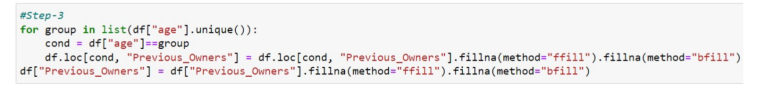

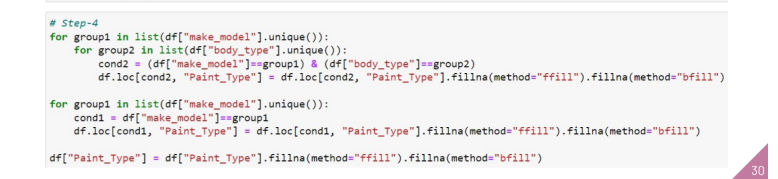

In [19]:
df["body"].value_counts(dropna = False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body, dtype: int64

In [20]:
df.drop("body", axis = 1, inplace = True) ## body_type ıle benzer oldugundan drop edilmiştir.

## Previous Owner vs prev_owner

In [21]:
df["previous_owners"].value_counts(dropna = False)

1.0    8294
NaN    6640
2.0     778
0.0     188
3.0      17
4.0       2
Name: previous_owners, dtype: int64

In [22]:
df["previous_owners"]=df["previous_owners"].fillna(method='bfill').fillna(method='ffill')

In [23]:
df["previous_owners"].value_counts(dropna = False)

1.0    14169
2.0     1179
0.0      531
3.0       38
4.0        2
Name: previous_owners, dtype: int64

In [24]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'vat', 'km',
       'registration', 'prev_owner', 'hp', 'type', 'previous_owners',
       'next_inspection', 'inspection_new', 'warranty', 'full_service',
       'non_smoking_vehicle', 'make', 'model', 'offer_number',
       'first_registration', 'body_color', 'paint_type', 'body_color_original',
       'upholstery', 'nr_of_doors', 'nr_of_seats', 'model_code',
       'gearing_type', 'displacement', 'cylinders', 'weight', 'drive_chain',
       'fuel', 'consumption', 'co_2_emission', 'emission_class',
       'comfort_&_convenience', 'entertainment_&_media', 'extras',
       'safety_&_security', 'description', 'emission_label', 'gears',
       'country_version', 'age', 'consumption_country', 'consumption_city',
       'consumption_comb'],
      dtype='object')

In [25]:
df["prev_owner"].value_counts(dropna = False)

1.0    8294
NaN    6828
2.0     778
3.0      17
4.0       2
Name: prev_owner, dtype: int64

In [26]:
df["prev_owner"].fillna(method='bfill').fillna(method='ffill').value_counts()

1.0    14692
2.0     1187
3.0       38
4.0        2
Name: prev_owner, dtype: int64

## Second Drop

In [27]:
## 0 araç olmadığını gösterdiği için ve previous ownere benzediğinden drop edildi. Fiyata etki etmeyen bazı stunlarında silinmesi gerektiğini karar verdıgımden drop edildi.

In [28]:
second_drop = ["prev_owner", 'weight','non_smoking_vehicle','full_service']

In [29]:
df.drop(second_drop, axis=1, inplace=True)

## comfort_&_convenience

In [30]:
df['comfort_&_convenience'].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

In [31]:
df.groupby("make_model")["comfort_&_convenience"].describe()

,count,unique,top,freq
make_model,,,,
Audi A1,2532,1052,"Air conditioning,Armrest,Automatic climate con...",94
Audi A2,1,1,"Air conditioning,Armrest,Automatic climate con...",1
Audi A3,2996,1316,"Air conditioning,Automatic climate control,Cru...",89
Opel Astra,2358,1211,"Air conditioning,Cruise control,Electrical sid...",39
Opel Corsa,2046,671,"Air conditioning,Electrical side mirrors,Hill ...",203
Opel Insignia,2397,1372,"Air conditioning,Armrest,Automatic climate con...",55
Renault Clio,1714,684,"Cruise control,Electrical side mirrors,Power w...",48
Renault Duster,34,3,"Air conditioning,Automatic climate control",32
Renault Espace,921,585,"Air conditioning,Armrest,Automatic climate con...",27


In [32]:
fill_most(df, "make_model", "comfort_&_convenience")

In [33]:
df.groupby("make_model")["comfort_&_convenience"].describe()

,count,unique,top,freq
make_model,,,,
Audi A1,2614,1052,"Air conditioning,Armrest,Automatic climate con...",176
Audi A2,1,1,"Air conditioning,Armrest,Automatic climate con...",1
Audi A3,3097,1316,"Air conditioning,Automatic climate control,Cru...",190
Opel Astra,2526,1211,"Air conditioning,Cruise control,Electrical sid...",207
Opel Corsa,2219,671,"Air conditioning,Electrical side mirrors,Hill ...",376
Opel Insignia,2598,1372,"Air conditioning,Armrest,Automatic climate con...",256
Renault Clio,1839,684,"Cruise control,Electrical side mirrors,Power w...",173
Renault Duster,34,3,"Air conditioning,Automatic climate control",32
Renault Espace,991,585,"Air conditioning,Armrest,Automatic climate con...",97


In [34]:
df['comfort_&_convenience'].value_counts(dropna = False)

Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   389
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrical side mirrors,Electric tailgate,Heated steering wheel,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system          259
Air conditioning,Cruis

## Entertainment_&_Media

In [35]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'vat', 'km',
       'registration', 'hp', 'type', 'previous_owners', 'next_inspection',
       'inspection_new', 'warranty', 'make', 'model', 'offer_number',
       'first_registration', 'body_color', 'paint_type', 'body_color_original',
       'upholstery', 'nr_of_doors', 'nr_of_seats', 'model_code',
       'gearing_type', 'displacement', 'cylinders', 'drive_chain', 'fuel',
       'consumption', 'co_2_emission', 'emission_class',
       'comfort_&_convenience', 'entertainment_&_media', 'extras',
       'safety_&_security', 'description', 'emission_label', 'gears',
       'country_version', 'age', 'consumption_country', 'consumption_city',
       'consumption_comb'],
      dtype='object')

In [36]:
df['entertainment_&_media'].value_counts(dropna = False)

NaN                                                                                                 1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                                           1
CD player,Hands-free equipment,MP3,Radio,USB                                                           1
MP3,Radio,Sound system,USB                                                                             1
Bluetooth,MP3,On-board computer,Radio,Television,USB   

In [37]:
fill_most(df, "make_model", "entertainment_&_media")

In [38]:
df['entertainment_&_media'].value_counts(dropna = False)

Bluetooth,Hands-free equipment,On-board computer,Radio,USB                      2015
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                  1206
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB        1049
Bluetooth,Hands-free equipment,On-board computer,Radio                           529
On-board computer,Radio                                                          487
                                                                                ... 
Bluetooth,CD player,MP3                                                            1
CD player,USB                                                                      1
Bluetooth,CD player,Digital radio,Radio,USB                                        1
Bluetooth,CD player,Digital radio,MP3,On-board computer,Radio,Television,USB       1
Hands-free equipment,On-board computer,Radio,Sound system                          1
Name: entertainment_&_media, Length: 346, dtype: int64

## Extras

In [39]:
df['extras'].value_counts(dropna = False)

Alloy wheels                                                                                               3245
NaN                                                                                                        2962
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

In [40]:
fill_most(df, "make_model", "extras")

In [41]:
df['extras'].value_counts(dropna = False)

Alloy wheels                                                                                               6174
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
Alloy wheels,Roof rack                                                                                      385
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

## safety_&_security

In [42]:
df['safety_&_security'].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

In [43]:
fill_most(df, "make_model", "safety_&_security")

In [44]:
df['safety_&_security'].value_counts(dropna = False)

ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      825
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                 480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                     

## consumption

In [45]:
df["consumption_comb"] ## bu kullanılcak fazla veriye gerek yok

0        3.8
1        5.6
2        3.8
3        3.8
4        4.1
        ... 
15914    5.3
15915    NaN
15916    5.3
15917    5.3
15918    6.8
Name: consumption_comb, Length: 15919, dtype: float64

In [46]:
df["consumption_city"]

0        4.3
1        7.1
2        4.4
3        4.3
4        4.6
        ... 
15914    6.2
15915    7.0
15916    6.2
15917    6.2
15918    8.7
Name: consumption_city, Length: 15919, dtype: float64

In [47]:
df["consumption_country"]

0        3.5
1        4.7
2        3.4
3        3.5
4        3.8
        ... 
15914    4.7
15915    NaN
15916    4.7
15917    4.7
15918    5.7
Name: consumption_country, Length: 15919, dtype: float64

In [48]:
df["consumption_comb"].value_counts(dropna = False)

NaN    2883
3.9     732
4.0     716
5.4     663
5.1     630
4.4     595
3.8     585
5.6     568
4.7     555
4.8     523
5.0     520
4.5     511
5.2     429
4.6     420
4.2     408
5.3     375
3.7     369
4.9     348
5.5     342
4.1     341
5.9     308
3.3     307
5.7     302
4.3     295
3.5     288
6.0     278
3.6     194
6.2     184
5.8     142
6.3     141
6.1     135
6.8     134
6.6     119
3.4     106
3.0      73
6.4      64
7.4      62
7.1      38
1.0      37
6.5      36
6.7      33
3.2      25
6.9      21
8.3      20
7.6      14
7.0       9
3.1       7
7.8       6
7.2       6
8.0       5
8.6       3
8.7       3
0.0       2
8.1       2
7.9       2
7.3       2
7.5       1
9.1       1
1.2       1
Name: consumption_comb, dtype: int64

In [49]:
consumption_comb = (df["consumption_city"]+df["consumption_country"])/2

In [50]:
df["consumption_comb"].fillna(consumption_comb).value_counts(dropna = False) 
## çok mantıklı gelmedı böyle doldurmak çok null değer var

NaN     2775
3.90     732
4.00     716
5.40     663
5.10     630
4.40     595
3.80     585
5.60     568
4.70     560
4.80     523
5.00     520
4.50     512
5.20     429
4.60     420
4.20     408
5.30     375
3.70     369
4.90     348
5.50     342
4.10     341
5.90     308
3.30     307
5.70     302
4.30     295
3.50     288
6.00     278
3.60     194
6.20     184
5.80     143
6.30     141
6.10     135
6.80     134
3.40     125
6.60     119
3.00      73
6.40      64
7.40      62
7.10      38
3.60      37
1.00      37
6.50      36
6.70      33
3.20      25
6.90      21
3.65      20
8.30      20
5.15      19
7.60      14
7.00       9
3.10       7
7.20       6
7.80       6
8.00       5
8.70       3
8.60       3
3.95       3
7.30       2
8.10       2
5.45       2
0.00       2
7.90       2
9.10       1
4.55       1
1.20       1
7.50       1
Name: consumption_comb, dtype: int64

In [51]:
fill_most(df, "make_model", "consumption_comb")

In [52]:
df["consumption_comb"].value_counts(dropna = False)

4.5    1120
4.0    1112
5.2     965
5.7     845
4.8     814
4.7     740
3.9     732
5.4     663
5.1     630
3.3     629
4.4     595
3.8     585
5.6     568
5.0     520
4.6     420
4.2     408
5.3     375
3.7     369
4.9     348
5.5     342
4.1     341
5.9     308
4.3     295
3.5     288
6.0     278
3.6     194
6.2     184
5.8     142
6.3     141
6.1     135
6.8     134
6.6     119
3.4     106
3.0      73
6.4      64
7.4      62
7.1      38
1.0      38
6.5      36
6.7      33
3.2      25
6.9      21
8.3      20
7.6      14
7.0       9
3.1       7
7.8       6
7.2       6
8.0       5
8.6       3
8.7       3
8.1       2
7.3       2
7.9       2
0.0       2
7.5       1
9.1       1
1.2       1
Name: consumption_comb, dtype: int64

In [53]:
## sadece ortalama kullanılcak fazla veriye gerek yok. correlasyon olarakta uygun

<AxesSubplot:>

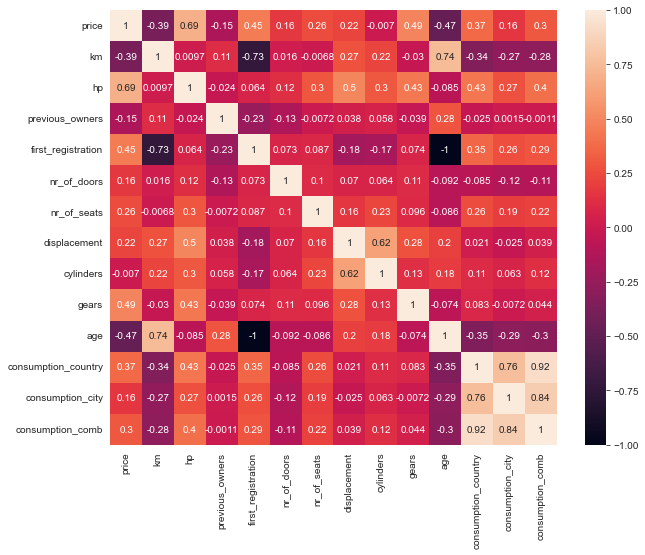

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [55]:
df.drop('consumption_city', axis=1, inplace=True)

In [56]:
df.drop('consumption_country', axis=1, inplace=True)

## Body Color vs Body Color Original

In [57]:
df["body_color"].value_counts(dropna = False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

In [58]:
df["body_color"].fillna(method = "bfill", inplace = True)

In [59]:
df["body_color"].value_counts(dropna = False)

Black     3888
Grey      3638
White     3540
Silver    1687
Blue      1524
Red        989
Brown      299
Green      163
Beige      108
Yellow      53
Violet      18
Bronze       7
Orange       3
Gold         2
Name: body_color, dtype: int64

In [60]:
df["body_color_original"].value_counts(dropna = False)

NaN                              3774
Onyx Schwarz                      338
Bianco                            282
Mythosschwarz Metallic            238
Brillantschwarz                   216
                                 ... 
Rouge-Braun (G0Y)                   1
VARI COLRI DISPONIBILI              1
Kokosnussbraun Metallic             1
Farbe frei wählbar                  1
Perlmutt-Weiß Metallic (Weiß)       1
Name: body_color_original, Length: 1927, dtype: int64

In [61]:
df.drop('body_color_original',inplace=True,axis = 1)

## Third Drop

In [62]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'vat', 'km',
       'registration', 'hp', 'type', 'previous_owners', 'next_inspection',
       'inspection_new', 'warranty', 'make', 'model', 'offer_number',
       'first_registration', 'body_color', 'paint_type', 'upholstery',
       'nr_of_doors', 'nr_of_seats', 'model_code', 'gearing_type',
       'displacement', 'cylinders', 'drive_chain', 'fuel', 'consumption',
       'co_2_emission', 'emission_class', 'comfort_&_convenience',
       'entertainment_&_media', 'extras', 'safety_&_security', 'description',
       'emission_label', 'gears', 'country_version', 'age',
       'consumption_comb'],
      dtype='object')

In [63]:
## Emisyonların fiyata bir etkisi yok 

In [64]:
third_drop= ["co_2_emission","emission_class","emission_label","make","model"]

In [65]:
df.drop(third_drop,axis=1,inplace=True)

## Displacement

In [66]:
df["displacement"].value_counts(dropna = False)

1598.0     4761
999.0      2438
1398.0     1314
1399.0      749
1229.0      677
1956.0      670
1461.0      595
1490.0      559
NaN         496
1422.0      467
1197.0      353
898.0       351
1395.0      320
1968.0      301
1149.0      288
1618.0      212
1798.0      210
1498.0      196
1600.0      130
1248.0      110
1997.0      103
1364.0      102
1400.0       90
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1200.0       18
1984.0       18
1397.0       11
899.0        11
160.0         6
929.0         5
1499.0        5
997.0         4
1596.0        4
139.0         4
900.0         4
1599.0        3
1199.0        3
1396.0        3
1495.0        2
1589.0        2
1300.0        2
2.0           2
995.0         2
1496.0        1
890.0         1
1580.0        1
1995.0        1
1333.0        1
54.0          1
1533.0        1
1100.0        1
1350.0        1
16000.0       1
1856.0        1
1568.0        1
1896.0        1
1584.0  

In [67]:
fill_most(df,"make_model","displacement")

In [68]:
df["displacement"].value_counts(dropna = False)

1598.0     5063
999.0      2467
1398.0     1388
1399.0      749
1461.0      686
1229.0      677
1956.0      670
1490.0      559
1422.0      467
1197.0      353
898.0       351
1395.0      320
1968.0      301
1149.0      288
1618.0      212
1798.0      210
1498.0      196
1600.0      130
1248.0      110
1997.0      103
1364.0      102
1400.0       90
998.0        72
1500.0       50
2000.0       46
1000.0       40
1.0          36
1998.0       25
2480.0       20
1200.0       18
1984.0       18
1397.0       11
899.0        11
160.0         6
929.0         5
1499.0        5
997.0         4
1596.0        4
139.0         4
900.0         4
1599.0        3
1199.0        3
1396.0        3
1495.0        2
1589.0        2
1300.0        2
2.0           2
995.0         2
1496.0        1
890.0         1
1580.0        1
1995.0        1
1333.0        1
54.0          1
1533.0        1
1100.0        1
1350.0        1
16000.0       1
1856.0        1
1568.0        1
1896.0        1
1584.0        1
996.0   

## Gears

In [69]:
df.gears.value_counts(dropna=False)

6.0     5822
NaN     4712
5.0     3239
7.0     1908
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

In [70]:
df["gears"] = df["gears"].fillna(df.groupby("make_model")["gears"].transform("median"))

In [71]:
df.gears.value_counts(dropna=False)

6.0     9361
5.0     4411
7.0     1908
8.0      224
9.0        6
1.0        2
3.0        2
4.0        2
NaN        1
2.0        1
50.0       1
Name: gears, dtype: int64

In [72]:
df.columns

Index(['make_model', 'short_description', 'body_type', 'price', 'vat', 'km',
       'registration', 'hp', 'type', 'previous_owners', 'next_inspection',
       'inspection_new', 'warranty', 'offer_number', 'first_registration',
       'body_color', 'paint_type', 'upholstery', 'nr_of_doors', 'nr_of_seats',
       'model_code', 'gearing_type', 'displacement', 'cylinders',
       'drive_chain', 'fuel', 'consumption', 'comfort_&_convenience',
       'entertainment_&_media', 'extras', 'safety_&_security', 'description',
       'gears', 'country_version', 'age', 'consumption_comb'],
      dtype='object')

## nr_of_seats

In [73]:
df["nr_of_seats"].value_counts(dropna=False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

In [74]:
fill_most(df,"make_model", "nr_of_seats")

In [75]:
df["nr_of_seats"].value_counts(dropna=False)

5.0    14313
4.0     1125
7.0      362
2.0      116
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

## nr_of_doors

In [76]:
df["nr_of_doors"].value_counts(dropna=False)

5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

In [77]:
fill_most(df,"make_model", "nr_of_doors")

In [78]:
df["nr_of_doors"].value_counts(dropna=False)

5.0    11787
4.0     3079
3.0      832
2.0      219
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

## Type

In [79]:
df["type"].value_counts(dropna = False)

Used    12903
New      3014
NaN         2
Name: type, dtype: int64

In [80]:
fill_most(df,"make_model", "type")

In [81]:
df["type"].value_counts(dropna = False)

Used    12905
New      3014
Name: type, dtype: int64

## Upholstery

In [82]:
df["upholstery"].value_counts(dropna = False)

Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Full leather, Brown     116
Part leather, Grey      116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Velour, Black            36
Full leather, Beige      36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Brown                    12
Cloth, Blue              12
Velour, Grey              8
Cloth, White              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige               

In [83]:
fill_most2(df, "make_model", "body_type", "upholstery")

In [84]:
df["upholstery"].value_counts(dropna = False)

Cloth, Black           8946
Part leather, Black    1174
Cloth                  1011
Cloth, Grey             907
Black                   693
Cloth, Other            639
Full leather, Black     575
Full leather, Brown     416
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Part leather, Grey      116
Other, Black            110
Full leather, Grey       83
Full leather, Other      72
Part leather, Other      66
Other                    56
Part leather, Brown      50
alcantara, Black         47
Full leather, Beige      37
Velour, Black            36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Cloth, Blue              12
Brown                    12
Velour, Grey              8
Cloth, White              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige                     3
Part leather, White 

In [85]:
df

,make_model,short_description,body_type,price,vat,km,registration,hp,type,previous_owners,next_inspection,inspection_new,warranty,offer_number,first_registration,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement,cylinders,drive_chain,fuel,consumption,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,gears,country_version,age,consumption_comb
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.0,2016-01-01,66.0,Used,2.0,2021-06-01,Yes,NaN,LR-062483,2016.0,Black,Metallic,"Cloth, Black",5.0,5.0,0588/BDF,Automatic,1422.0,3.0,front,Diesel,"[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city...","Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...","['\n', 'Sicherheit:', ' ', 'Deaktivierung für ...",6.0,NaN,4.0,3.8
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.0,2017-03-01,141.0,Used,1.0,NaN,NaN,NaN,NaN,2017.0,Red,NaN,"Cloth, Grey",3.0,4.0,0588/BCY,Automatic,1798.0,4.0,front,Benzine,"[['5.6 l/100 km (comb)'], ['7.1 l/100 km (city...","Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",['\nLangstreckenfahrzeug daher die hohe Kilome...,7.0,NaN,3.0,5.6
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.0,2016-02-01,85.0,Used,1.0,NaN,NaN,NaN,AM-95365,2016.0,Black,Metallic,"Cloth, Black",4.0,4.0,NaN,Automatic,1598.0,NaN,front,Diesel,"[['3.8 l/100 km (comb)'], ['4.4 l/100 km (city...","Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...","['\n', 'Fahrzeug-Nummer: AM-95365', ' ', 'Ehem...",6.0,NaN,4.0,3.8
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,NaN,73000.0,2016-08-01,66.0,Used,1.0,NaN,NaN,NaN,NaN,2016.0,Brown,Metallic,"Cloth, Black",3.0,4.0,NaN,Automatic,1422.0,3.0,NaN,Diesel,"[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city...","Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...","['\nAudi A1: ', '- 1e eigenaar ', '- Perfecte ...",6.0,NaN,4.0,3.8
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,NaN,16200.0,2016-05-01,66.0,Used,1.0,NaN,Yes,NaN,C1626,2016.0,Black,Metallic,"Cloth, Black",5.0,5.0,0588/BDF,Automatic,1422.0,3.0,front,Diesel,"[['4.1 l/100 km (comb)'], ['4.6 l/100 km (city...","Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...","['\n', 'Technik & Sicherheit:', 'Xenon plus', ...",6.0,Germany,4.0,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,NaN,NaN,147.0,New,1.0,NaN,NaN,NaN,10988301,NaN,Grey,Metallic,"Full leather, Brown",5.0,5.0,NaN,Automatic,1997.0,4.0,front,Diesel,"[['5.3 l/100 km (comb)'], ['6.2 l/100 km (city...","Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",['\nVettura visionabile nella sede in Via Roma...,6.0,NaN,1.0,5.3
15915,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,39885,VAT deductible,9900.0,2019-01-01,165.0,Used,1.0,2022-01-01,NaN,NaN,507370_3223,2019.0,Grey,Metallic,Cloth,5.0,5.0,0000/000,Automatic,1798.0,4.0,front,Benzine,"['\n', '7.4 l/100 km (comb)', '\n', '9.2 l/100...","Air conditioning,Auto

In [86]:
df.isnull().sum()*100/df.shape[0]

make_model                0.000000
short_description         0.288963
body_type                 0.000000
price                     0.000000
vat                      28.349771
km                        6.432565
registration             10.032037
hp                        0.552799
type                      0.000000
previous_owners           0.000000
next_inspection          82.253910
inspection_new           77.573968
warranty                 82.436083
offer_number             19.944720
first_registration       10.032037
body_color                0.000000
paint_type               36.258559
upholstery                0.000000
nr_of_doors               0.000000
nr_of_seats               0.000000
model_code               68.729192
gearing_type              0.000000
displacement              0.000000
cylinders                35.680633
drive_chain              43.080596
fuel                      0.000000
consumption              11.973114
comfort_&_convenience     0.000000
entertainment_&_medi

## Forty Drop

In [87]:
forty_drop = ["short_description","warranty","offer_number","registration","first_registration"]
df.drop(forty_drop,axis=1,inplace=True)

## HP

In [88]:
df["hp"].value_counts(dropna = False)

85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
70.0      888
125.0     707
51.0      695
55.0      569
118.0     516
92.0      466
121.0     392
147.0     380
77.0      345
56.0      286
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
NaN        88
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
82.0       22
52.0       22
78.0       20
1.0        20
294.0      18
146.0      18
141.0      16
57.0       10
104.0       8
120.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
90.0        4
76.0        4
65.0        4
149.0       3
80.0        3
168.0       3
98.0        3
93.0        3
228.0       2
270.0       2
53.0        2
140.0       2
86.0        2
167.0       2
127.0       2
89.0        2
143.0       2
63.0        2
40.0        2
150.0       2
163.0       1
115.0       1
132.0       1
75.0  

In [89]:
df.hp.loc[df.hp < 40] = np.nan

In [90]:
#fill_most(df,"make_model","hp")

In [91]:
df["hp"] = df["hp"].fillna(df.groupby("make_model")["hp"].transform("median"))

In [92]:
df["hp"].value_counts(dropna = False)

85.0     2544
66.0     2131
81.0     1402
100.0    1308
110.0    1112
70.0      890
125.0     707
51.0      695
55.0      569
118.0     552
92.0      475
121.0     406
147.0     380
77.0      353
56.0      316
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
82.0       22
52.0       22
78.0       20
294.0      18
146.0      18
141.0      16
57.0       10
104.0       8
120.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
76.0        4
90.0        4
65.0        4
98.0        3
168.0       3
149.0       3
80.0        3
93.0        3
143.0       2
86.0        2
140.0       2
150.0       2
228.0       2
270.0       2
53.0        2
167.0       2
63.0        2
40.0        2
127.0       2
89.0        2
123.0       1
84.0        1
239.0       1
44.0        1
137.0       1
163.0 

## km

In [93]:
df.km.value_counts(dropna = False)

10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6690, dtype: int64

In [94]:
fill_most2(df,"make_model","age","km")

In [95]:
df.km.value_counts(dropna = False)

10.0       2021
1.0         385
5.0         170
50.0        148
100.0       139
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6689, dtype: int64

## VAT

In [96]:
df.vat.value_counts(dropna = False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [97]:
df.vat.fillna(method = "ffill", inplace = True)

In [98]:
df.vat.value_counts(dropna = False)

VAT deductible      15048
Price negotiable      871
Name: vat, dtype: int64

## inspection_new

In [99]:
df["inspection_new"].value_counts(dropna = False)

NaN    12349
Yes     3570
Name: inspection_new, dtype: int64

In [100]:
df["inspection_new"]=df["inspection_new"].replace({"Yes":1,np.nan:0}, regex=True)

In [101]:
df["inspection_new"].value_counts(dropna = False)

0    12349
1     3570
Name: inspection_new, dtype: int64

## drive_chain

In [102]:
df["drive_chain"].value_counts(dropna = False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [103]:
fill_most(df,"make_model", "drive_chain")

In [104]:
df["drive_chain"].value_counts(dropna = False)

front    15712
4WD        203
rear         4
Name: drive_chain, dtype: int64

## Last Drop and Finish

In [105]:
fifty_drop=["consumption","next_inspection","paint_type","model_code","cylinders","country_version","description"]
df.drop(fifty_drop,axis=1,inplace=True)

In [106]:
df.shape

(15919, 24)

In [107]:
df.isnull().sum()*100/df.shape[0]

make_model               0.000000
body_type                0.000000
price                    0.000000
vat                      0.000000
km                       0.000000
hp                       0.000000
type                     0.000000
previous_owners          0.000000
inspection_new           0.000000
body_color               0.000000
upholstery               0.000000
nr_of_doors              0.000000
nr_of_seats              0.000000
gearing_type             0.000000
displacement             0.000000
drive_chain              0.000000
fuel                     0.000000
comfort_&_convenience    0.000000
entertainment_&_media    0.000000
extras                   0.000000
safety_&_security        0.000000
gears                    0.006282
age                      0.000000
consumption_comb         0.000000
dtype: float64

In [108]:
df.to_csv("zeromissvalue.csv", index=False)